# stack() and unstack()

- stack :堆, 疊

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("../data/summer.csv")

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
medals_by_country = summer.groupby(["Country", "Medal"]).Medal.count()

In [5]:
medals_by_country

Country  Medal 
AFG      Bronze       2
AHO      Silver       1
ALG      Bronze       8
         Gold         5
         Silver       2
ANZ      Bronze       5
         Gold        20
         Silver       4
ARG      Bronze      91
         Gold        69
         Silver      99
ARM      Bronze       8
         Gold         1
         Silver       2
AUS      Bronze     472
         Gold       312
         Silver     405
AUT      Bronze      44
         Gold        21
         Silver      81
AZE      Bronze      15
         Gold         6
         Silver       5
BAH      Bronze       5
         Gold        13
         Silver       9
BAR      Bronze       1
BDI      Gold         1
BEL      Bronze     152
         Gold        91
                   ... 
UKR      Bronze      90
         Gold        41
         Silver      42
URS      Bronze     584
         Gold       838
         Silver     627
URU      Bronze      30
         Gold        44
         Silver       2
USA      Bronze    1098


In [6]:
type(medals_by_country)

pandas.core.series.Series

因為資料的前兩欄都是index，所以這是一個pandas series  

---
**note04_第二節_講座六.ipynb**
- series 是指 one dimension labeled array，label就是有index

In [7]:
medals_by_country.loc["USA"]

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [8]:
type(medals_by_country.loc["USA"])

pandas.core.series.Series

是pandas series同上。 

---
當然可以用index取欄位更精準，但是要注意用小括號() 

In [9]:
medals_by_country.loc[("USA", "Gold")]

2235

In [10]:
type(medals_by_country.loc[("USA", "Gold")])

numpy.int64

---
如果是用中括弧[]的方式會失敗!!  
結果會只有選出最外層index篩選的結果

In [11]:
medals_by_country.loc[["USA", "Gold"]]

Country  Medal 
USA      Bronze    1098
         Gold      2235
         Silver    1252
Name: Medal, dtype: int64

In [12]:
type(medals_by_country.loc[["USA", "Gold"]])

pandas.core.series.Series

---

## shape attribute

In [13]:
medals_by_country.shape

(347,)

表示有347rows，且one column

---
## unstack()

這樣的資料，我們就會聯想到長轉寬或是寬轉長的資料轉換

In [14]:
medals_by_country.unstack()
# index = Country
# three columns = Bronze, Gold, Silver

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
ARM,8.0,1.0,2.0
AUS,472.0,312.0,405.0
AUT,44.0,21.0,81.0
AZE,15.0,6.0,5.0


In [15]:
type(medals_by_country.unstack())

pandas.core.frame.DataFrame

In [16]:
medals_by_country.unstack().index

Index(['AFG', 'AHO', 'ALG', 'ANZ', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BAH',
       ...
       'URS', 'URU', 'USA', 'UZB', 'VEN', 'VIE', 'YUG', 'ZAM', 'ZIM', 'ZZX'],
      dtype='object', name='Country', length=147)

In [17]:
medals_by_country.unstack().columns

Index(['Bronze', 'Gold', 'Silver'], dtype='object', name='Medal')

**幾格觀察結論**

- [two index, one colums].unstack()的結果會是會是一個dataframe
- 缺失的地方會是NaN
- column 為原本 Medal欄位裡面的值(Bronze, Gold, Silver)
- 預設最外層的index會是unstack()結束後的index

---
目前不知道如果有 三層以上的index會發生什麼事。

---
裡面有些參數是可以調整的地方  
- level 是指定要將哪一個欄位的職展開，變成新的欄位。

medals_by_country = medals_by_country.unstack(level = -1, fill_value= Npne)  
上面的參數是預設的樣子，其中
- level: 就是指定要 unstack 的index。int, string, or list of these, default last level. Level(s) to unstack, can pass level name
- fill_value : replace NaN with this value if the unstack produces missing values

因為有兩個index，所以 level = -1，就是最後一個、最內側的index = Medal!!

In [18]:
medals_by_country.unstack(level = -2)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


---
現在我們要用整理好的數據去取代。

In [19]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value = 0)

In [20]:
medals_by_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [21]:
medals_by_country.shape
# 147 rows and 3 columns

(147, 3)

整理後，給他一個變數，就可以改變dataframe的shape了!!  
使資料在閱讀上也比較方便，容易理解。

---
接下來我們可以用選欄位的方法，重新調整我們的欄位順序~

In [22]:
medals_by_country = medals_by_country[["Gold", "Silver", "Bronze"]] #金, 銀, 銅

In [23]:
medals_by_country.head()

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91


---
接下來我們可能會想要依照得金數做排序  
金牌最多的排前面，依序是銀牌、銅牌

In [24]:
medals_by_country.sort_values(by = ["Gold", "Silver", "Bronze"], ascending = [False, False, False])

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [25]:
medals_by_country.head()
# 可以看到還是原本的排序

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91


In [26]:
medals_by_country.sort_values(by = ["Gold", "Silver", "Bronze"], ascending = [False, False, False], inplace = True)
# inplace = False是預設，就是不取代妳原本的資料集
# inplace = True則依照妳設定的排序方式，取代原本的資料集

In [27]:
medals_by_country.head(10)
# 新的排序結果

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [28]:
import matplotlib.pyplot as plt

In [29]:
plt.style.use("seaborn")

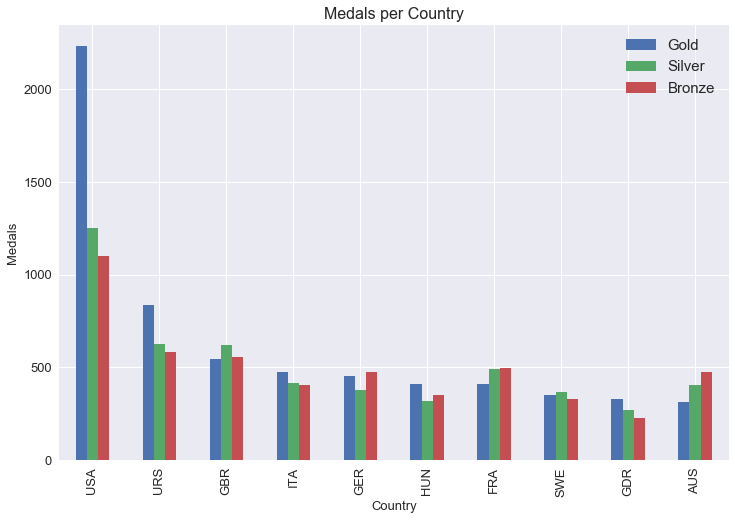

In [30]:
medals_by_country.head(n=10).plot(kind = "bar", figsize = (12,8), fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("Medals", fontsize = 13)
plt.title("Medals per Country", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

---
## Stack()

事實上就是 unstack()的逆轉換。  
前面的unstack()將 Medal index 的三個level(值): Gold, Silver, Bronze，轉換成三個columns  
stack()就是re-create Medal column

In [31]:
medals_by_country

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [32]:
medals_by_country.stack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
         Bronze     584
GBR      Gold       546
         Silver     621
         Bronze     553
ITA      Gold       476
         Silver     416
         Bronze     404
GER      Gold       452
         Silver     378
         Bronze     475
HUN      Gold       412
         Silver     316
         Bronze     351
FRA      Gold       408
         Silver     491
         Bronze     497
SWE      Gold       349
         Silver     367
         Bronze     328
GDR      Gold       329
         Silver     271
         Bronze     225
AUS      Gold       312
         Silver     405
         Bronze     472
                   ... 
BER      Gold         0
         Silver       0
         Bronze       1
BRN      Gold         0
         Silver       0
         Bronze       1
DJI      Gold         0
         Silver       0
         Bronze       1
ERI      Gold         0


In [33]:
type(medals_by_country.stack())

pandas.core.series.Series

In [34]:
medals_by_country.stack().unstack()
# 這樣就可以轉換來轉換去了!!

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225
